Lets suppose there are $m$ examples of size $d$, which are stored in a training matrix $D$ of size $m \times d$. Now if we use Euclidean distance for the finding the best match for a given test example  $q_{d\times1}$ how many multiplications and additions we will need to perform ?

The euclidean distance first substracts the x_i from y_i and squares it to remove the negative sign and then sum at each point.

So considering we have mxd matrix then we will have mxd substraction, adn as we are squaring at each step so mxd for that as well, also in the first step our sum is zero so our sum would be mx(d-1)

Here you will be implementing three versions of KNN classifiers, those are:
 1. Using two nested loops, i.e. for a given example you will have to compute its L2 distance with all the training samples, thus you will need to implement it using two nested loops...**Please first complete the assignment using this method and then go for further optimizations mentioned in step 2 and 3**
 2. Using one loop, i.e. you can get rid of one loop using the numpy vectorization (tiling the test example).
 3. The number of multiplications and additions can be reduced a lot if we use an alternate definition of Euclidean distance, i.e. $$||x-y||^2=||x||^2+||y||^2-2x^Ty$$
instead of using the traditional definition $$||x-y||^2=\sum_i (x_i-y_i)^2$$ This definition will help you to implement a very fast version of KNN classifier without using any loop whatsoever. 

#### HelpFul Functions
You might find following functions to be extremely helpful
 - **[argpartition] (http://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html)** uses introselect algorithm to perform an indirect partition along the given axis. This can lead to O(n) complexity instead of O(nlogn). Remember indexing start from 0.
 - **[itemfreq]()** a function that returns a 2-D array of item frequencies.

### K Nearest Neighbour Classifier

Now in this assignment we will be implementing the K Nearest Neighbour Classifier for Continuous attributes.


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


k = -5:
A negative k means you're looking for the indices that partition the array such that the 5 largest elements are in their correct position, while the other elements are unsorted. The 5 largest elements in this array are:

Largest elements: 
[
43
,
453
,
645
,
34
,
353
]
Largest elements: [43,453,645,34,353]

In [2]:
import numpy as np

#numpy.argpartition with a negative k, it finds the k largest elements instead of the k smallest ones.

arr = np.array([7, 2, 9, 4, 3, 6, 1,43,1,453,645,34,3,353])
k = -5

# Get the indices that would partition the array around the 3rd smallest element
indices = np.argpartition(arr, k)

# k=-5 so at -5 we have 43 so the values greater than 43 will be sorted
print(f"K={k}\nElement: {arr[k]}")
print("Array: ", arr)
print("Partitioned indices:", indices)
print("Array after argpartition:", arr[indices])

smallest_k_indices = np.argpartition(arr, k)[k:]
smallest_k_elements = arr[smallest_k_indices]

print("Indices of the smallest k elements:", smallest_k_indices)
print("Smallest k elements:", smallest_k_elements)

K=-5
Element: 453
Array:  [  7   2   9   4   3   6   1  43   1 453 645  34   3 353]
Partitioned indices: [ 8  6 12  3  4  5  1  0  2 11  7 13  9 10]
Array after argpartition: [  1   1   3   4   3   6   2   7   9  34  43 353 453 645]
Indices of the smallest k elements: [11  7 13  9 10]
Smallest k elements: [ 34  43 353 453 645]


In [3]:
import numpy as np

arr = np.array([1, 2, 3,3,4,5])
tiled_arr = np.tile(arr, 3)
print(tiled_arr)

[1 2 3 3 4 5 1 2 3 3 4 5 1 2 3 3 4 5]


In [4]:
help(np.tile)

Help on function tile in module numpy:

tile(A, reps)
    Construct an array by repeating A the number of times given by reps.
    
    If `reps` has length ``d``, the result will have dimension of
    ``max(d, A.ndim)``.
    
    If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
    axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
    or shape (1, 1, 3) for 3-D replication. If this is not the desired
    behavior, promote `A` to d-dimensions manually before calling this
    function.
    
    If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
    Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
    (1, 1, 2, 2).
    
    Note : Although tile may be used for broadcasting, it is strongly
    recommended to use numpy's broadcasting operations and functions.
    
    Parameters
    ----------
    A : array_like
        The input array.
    reps : array_like
        The number of repetitions of `A`

In [13]:
# Y=Ytrain
# feat=[0,1]
# X=Xtrain[:,feat]
# num_test = X.shape[0]
# num_train = Xtrain.shape[0]
# dists = np.zeros((num_test, num_train))

# # Assuming X, num_test, num_train, and dists are already defined

# print("X (Training/Test Data Matrix):")
# print(X.shape)
# print("\nNumber of Test Examples (num_test):")
# print(num_test)
# print("\nNumber of Training Examples (num_train):")
# print(num_train)
# print("\nDistance Matrix (dists):")
# print(dists.shape)

# # reshpae will create a 2d matrix from 1d and -1 indicate the row so mx1 matrix 
# X_square = np.sum(X ** 2, axis=1).reshape(-1, 1) # add the values in the rows
# print(X_square)

X (Training/Test Data Matrix):
(104, 2)

Number of Test Examples (num_test):
104

Number of Training Examples (num_train):
104

Distance Matrix (dists):
(104, 104)
[[36.56]
 [39.29]
 [33.62]
 [44.37]
 [33.62]
 [40.45]
 [32.04]
 [37.25]
 [51.85]
 [34.6 ]
 [32.72]
 [41.78]
 [27.49]
 [34.12]
 [38.26]
 [37.25]
 [34.  ]
 [37.96]
 [39.7 ]
 [29.6 ]
 [37.57]
 [40.45]
 [38.6 ]
 [33.62]
 [35.24]
 [40.45]
 [32.04]
 [34.6 ]
 [46.93]
 [32.65]
 [28.36]
 [47.89]
 [49.64]
 [42.85]
 [51.2 ]
 [40.36]
 [59.24]
 [40.4 ]
 [40.84]
 [36.01]
 [39.77]
 [51.97]
 [54.5 ]
 [43.29]
 [47.56]
 [54.08]
 [29.77]
 [45.05]
 [46.21]
 [40.9 ]
 [32.26]
 [45.05]
 [50.09]
 [30.29]
 [43.28]
 [40.33]
 [35.54]
 [37.61]
 [49.37]
 [45.94]
 [43.81]
 [46.85]
 [41.49]
 [40.33]
 [34.33]
 [45.05]
 [40.93]
 [44.98]
 [38.16]
 [55.78]
 [47.53]
 [68.29]
 [66.05]
 [55.78]
 [51.2 ]
 [67.13]
 [54.5 ]
 [76.85]
 [51.25]
 [62.08]
 [40.84]
 [51.25]
 [48.1 ]
 [41.48]
 [43.81]
 [53.89]
 [60.84]
 [55.24]
 [50.  ]
 [50.57]
 [40.93]
 [51.25]
 [40.93]

In [14]:
# import numpy as np
 
# arr = np.loadtxt(r"Iris.csv",delimiter=",", dtype=str)

# arr= np.array(arr[1:])
# arr= arr[:, 1:]

# x= arr[:, :2]
# x = x.astype(float)
# y= arr[:,4]
# mapping = {
#     'Iris-setosa': 0,
#     'Iris-versicolor': 1,
#     'Iris-virginica': 2
# }

# y = np.vectorize(mapping.get)(y)

# print(x)
# print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [15]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# # Split the data into 80% train and 20% test
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# print("Training data shape:", X_train.shape)
# print("Test data shape:", X_test.shape)
# print("Training labels shape:", y)


Training data shape: (120, 2)
Test data shape: (30, 2)
Training labels shape: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
def compute_distances_two_loops(X): # mxm where m is number of rows-> dimension of dists
    num_test = X.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    print(num_test, num_train)
    print(X)
    

    for i in range(num_test):
        for j in range(num_train):
            diff = X[i] - X_train[j]
            dists[i, j] = np.sqrt(np.sum(diff ** 2))

    return dists

compute_distances_two_loops(X_test)

30 120
[[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]
 [6.  2.9]
 [6.8 2.8]
 [5.4 3.4]
 [5.6 2.9]
 [6.9 3.1]
 [6.2 2.2]
 [5.8 2.7]
 [6.5 3.2]
 [4.8 3. ]
 [5.5 3.5]
 [4.9 3.1]
 [5.1 3.8]
 [6.3 3.3]
 [6.5 3. ]
 [5.6 2.5]
 [5.7 2.8]
 [6.4 2.8]
 [4.7 3.2]
 [6.1 3. ]
 [5.  3.4]
 [6.4 2.8]
 [7.9 3.8]
 [6.7 3. ]
 [6.7 2.5]
 [6.8 3.2]
 [4.8 3. ]
 [4.8 3.1]]


array([[1.7       , 1.64924225, 0.67082039, ..., 1.23693169, 0.36055513,
        1.0198039 ],
       [1.11803399, 0.6       , 1.22065556, ..., 0.2236068 , 1.20415946,
        1.61245155],
       [3.25729949, 2.69072481, 1.11803399, ..., 2.36008474, 1.9       ,
        0.72111026],
       ...,
       [2.23606798, 1.62788206, 0.14142136, ..., 1.28062485, 1.16619038,
        0.36055513],
       [0.63245553, 1.6643317 , 1.90262976, ..., 1.41421356, 1.07703296,
        2.3       ],
       [0.53851648, 1.58113883, 1.9       , ..., 1.3453624 , 1.11803399,
        2.30217289]])

In [7]:
# def scale_features(X): # between 0 to 1
#     # we will store these values compute on training set to use during testing 
#     xmin= np.min(X,axis=0)
#     xmax= np.max(X,axis=0)
#     ranges = xmax -xmin

#     ranges[ranges == 0] = 1  # Prevent division by zero

#     return (X-xmin)/ranges
# scale_features(X_train)

In [19]:
# def predict(X):
#     num_test = X.shape[0]
    
#     X= scale_features(X)
#     y_pred = np.zeros(num_test, dtype = y_train.dtype)

#     dists=compute_distances_two_loops(X)
#     for i in dists:
#         print(i)
    

#     for i in range(num_test):
#         # Get the indices of the k nearest neighbors using np.argpartition
#         nearest_neighbors = np.argpartition(dists[i, :], k)[k:] # will take the ith row which is a single test case and the distances and will find the nearest neighbours

#         # Get the labels of the k nearest neighbors
#         nearest_labels = y_train[nearest_neighbors]

#         # Perform majority voting to determine the predicted class
#         unique, counts = np.unique(nearest_labels, return_counts=True)
#         y_pred[i] = unique[np.argmax(counts)]

#         # Get the indices that would partition the array around the 3rd smallest element
#         indices = np.argpartition(arr, k)

#     return y_pred
# predict(X_test)

[5.26564633 6.6252948  6.82968017 5.30867509 4.86641873 6.23574625
 6.59788082 5.69622956 5.58722035 6.04624108 5.84482945 6.33182685
 6.82968017 6.08703797 5.97344384 5.45247937 6.34425183 6.55568694
 6.69828569 7.49213129 5.83691111 7.62837016 5.79154826 5.61288974
 7.65666581 5.84482945 5.64198824 5.53010228 5.78528575 4.84324594
 6.30670526 5.30867509 5.26374688 5.50404681 5.6618929  5.55783512
 5.88086144 8.02960343 5.03060943 6.29142522 5.67534415 6.34503989
 6.15077485 5.84482945 5.85423191 5.61400314 6.50822797 5.41613619
 6.08703797 4.95197246 6.39976806 5.41959696 5.36628654 5.45247937
 6.79039993 5.22872176 5.88532338 5.47421513 5.53010228 6.14975863
 5.12391757 7.05298031 6.02884991 6.08395687 7.72233975 5.49040356
 4.69862014 4.67006759 5.85423191 7.32884924 4.97514133 5.61288974
 4.75310754 6.23574625 6.59693347 5.14558366 6.88273429 6.55168156
 5.11366124 6.1999622  6.52951233 6.25196219 7.14472052 6.59788082
 5.78528575 7.01352488 6.06048936 6.60640078 5.71353929 5.2997

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Code from here

In [8]:
class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
        self.k=k
        self.scalefeatures=scalefeatures
            
    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the 
        test data.

        Input:
        X - An num_test x dimension array where each row is a test point.

        Output:
        dists - A num_test x num_train array where dists[i, j] is the distance
                between the ith test point and the jth training point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]               #
                #####################################################################
                diff = X[i] - self.X_train[j]

                dists[i, j] = np.sqrt(np.sum(diff ** 2))
 
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            #######################################################################
            diff = self.X_train - X[i, :] 
            dists[i, :] = np.sqrt(np.sum(diff ** 2, axis=1))  
    
        return dists


    def compute_distances_no_loops(self, X):
        # Squared magnitudes of the test points (X) and training points (self.X_train)
        x_magnitude = np.sum(X**2, axis=1).reshape(-1, 1)  # Shape: (num_test, 1)
        y_magnitude = np.sum(self.X_train**2, axis=1).reshape(1, -1)  # Shape: (1, num_train)

        # Compute the cross term
        cross_term = np.dot(X, self.X_train.T)  # Shape: (num_test, num_train)

        # Compute the distances
        dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)

        return dists


    
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        # we will store these values compute on training set to use during testing 
        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)
        ranges = self.xmax - self.xmin
        
        ranges[ranges == 0] = 1  # Prevent division by zero

        return (X-self.xmin)/ranges

    def train(self, X, Y):
        ''' Train K Nearest Neighbour classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        self.X_train = X
        self.Y_train = Y
        nexamples,nfeatures=X.shape
        
        if self.scalefeatures:
            self.X_train = self.scale_features(self.X_train)
    
    def predict(self, X, methodtype='noloops'):
        
        """
        Test the trained K-Nearset Neighoubr classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
            methodtype: which method to use for calculating distances.
               noloops: without using any loop
               oneloop: using one loop
               twoloops: using two nested loops...
               
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        y_pred = np.zeros(num_test, dtype = self.Y_train.dtype)
        
        # defining a function variable so that you will only need to call compute_distance...
        if methodtype == 'noloops':
            compute_distance = self.compute_distances_no_loops
        elif methodtype == 'oneloop':
            compute_distance = self.compute_distances_one_loop
        else:
            compute_distance = self.compute_distances_two_loops
        
        dists=compute_distance(X)
        
        for i in range(num_test):
            # Get the indices of the k nearest neighbors using np.argpartition
            nearest_neighbors = np.argpartition(dists[i, :], self.k)[:self.k]

            # Optionally sort the nearest neighbors (this step ensures they are sorted by distance)
            nearest_neighbors = nearest_neighbors[np.argsort(dists[i, nearest_neighbors])]

            # Get the labels of the k nearest neighbors
            nearest_labels = self.Y_train[nearest_neighbors]

            # Perform majority voting to determine the predicted class
            unique, counts = np.unique(nearest_labels, return_counts=True)
            y_pred[i] = unique[np.argmax(counts)]
        
        return y_pred

In [9]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [10]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [11]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [12]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape )
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape )

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


# Training Time

In [167]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3) # train a 3-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

### Testing Your Distance Implementation and Timing (Profiling it)

In [168]:
#first lets compute distance of each test example from all the training examples using two loops 
dists = knn.compute_distances_two_loops(Xtest[:,feat])

(45, 104)


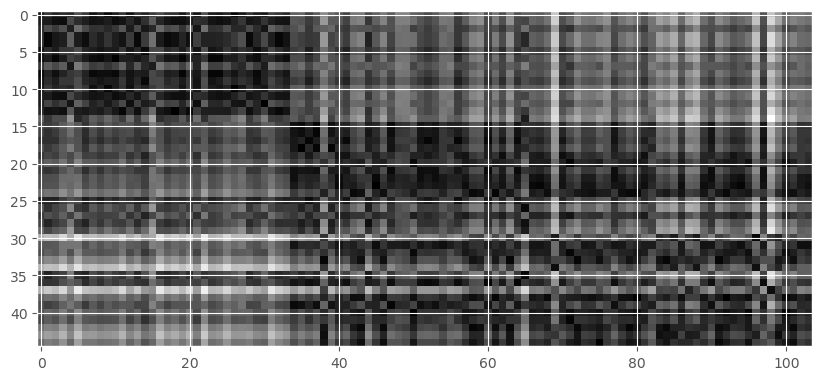

In [169]:
print( dists.shape)
# We can visualize the distance matrix: each row is a single test example and its distances to training examples",
plt.imshow(dists, interpolation='none')
plt.gray()
#here dark means less distance and light means high distance...

#### Optimization time
If you find spending too much time on these two steps skip them and come back later to speed up your implementation

In [170]:
from nose.tools import assert_less_equal
feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

dists = knn.compute_distances_two_loops(Xtest[:,feat])
one_loop_dists = knn.compute_distances_one_loop(Xtest[:,feat])
no_loop_dists = knn.compute_distances_no_loops(Xtest[:,feat])

difference = np.linalg.norm(dists - one_loop_dists, ord='fro')
difference_1 = np.linalg.norm(dists - no_loop_dists, ord='fro')

assert_less_equal(difference, 0.001, "Two loops and one loop distance varies")
assert_less_equal(difference_1, 0.001, "Two loops and no loop distance varies")

In [171]:
from nose.tools import assert_less_equal
import time

feat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)

start = time.time()
knn.compute_distances_two_loops(Xtest[:,feat])
end = time.time()
two_loops = (end - start)
print ("Two loops took : ",(end - start))

start = time.time()
one_loop = knn.compute_distances_one_loop(Xtest[:,feat])
end = time.time()
one_loop = (end - start)
print ("One loops took : ",(end - start))

start = time.time()
no_loop = knn.compute_distances_no_loops(Xtest[:,feat])
end = time.time()
no_loop = (end - start)
print ("No loops took  : ",(end - start))

assert_less_equal(one_loop, two_loops/10.0)
assert_less_equal(no_loop, one_loop)

Two loops took :  0.10539627075195312
One loops took :  0.0020935535430908203
No loops took  :  0.0010917186737060547


# Testing

In [172]:
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

In [173]:
print (pclasses)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


Lets see how good we are doing...
==================

In [174]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

36
Accuracy =  0.8


In [78]:
from nose.tools import assert_greater_equal

eat=[0,1]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.64)

 Plotting the Decision Surface of Training Set... 


C:\Users\user\AppData\Local\Temp\ipykernel_11524\343265871.py:85: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)
C:\Users\user\Desktop\Files\University\ML\Assignment\assignment-3\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


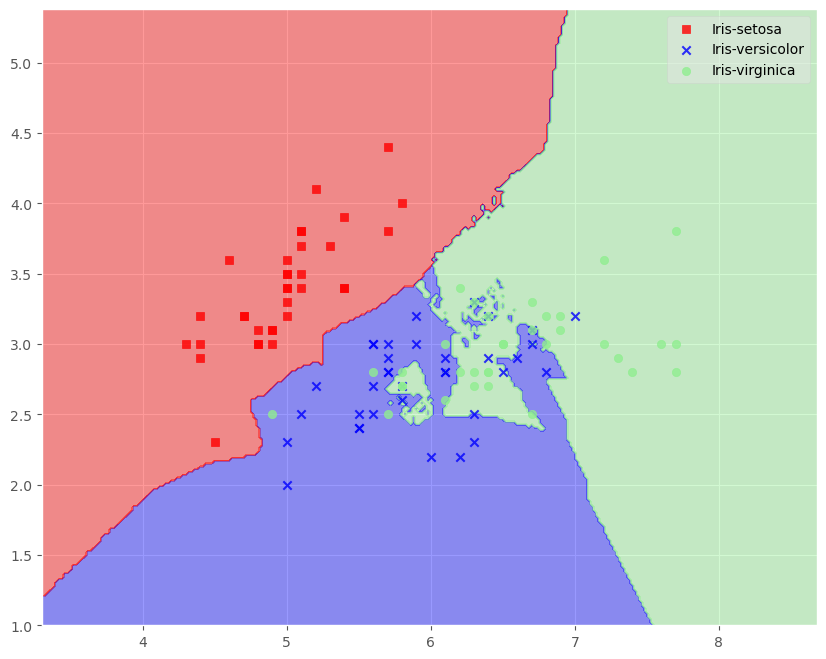

In [79]:
#Lets plot the decision surface
#%debug
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=knn, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 


C:\Users\user\AppData\Local\Temp\ipykernel_11524\343265871.py:85: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)


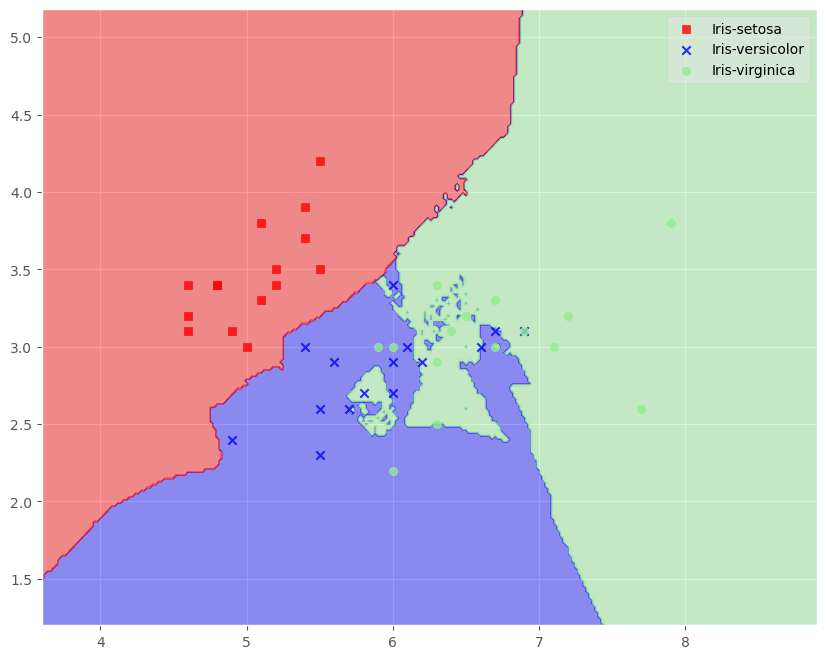

In [80]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Feature Scaling (or Normalization)

Since we are using Euclidean distance to find the nearest neighbours, which is (as we have seen in the lectures) is heavily influenced by differently scaled features (that features having different scales and ranges). So to make best of K Nearest Neigbhour classifier we will be needed to first scale each feature dimension. Now lets go and write code for the feature scaling in KNearestNeighbour...

In [81]:
# Lets train a KNN Classifier on Normalized Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3,scalefeatures=True) # train a 3-nearest neighbour classifier...

knn.train(Xtrain[:,feat],Ytrain)
#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

38
Accuracy =  0.8444444444444444


 Plotting the Decision Surface of Test Set... 


C:\Users\user\AppData\Local\Temp\ipykernel_11524\343265871.py:85: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)


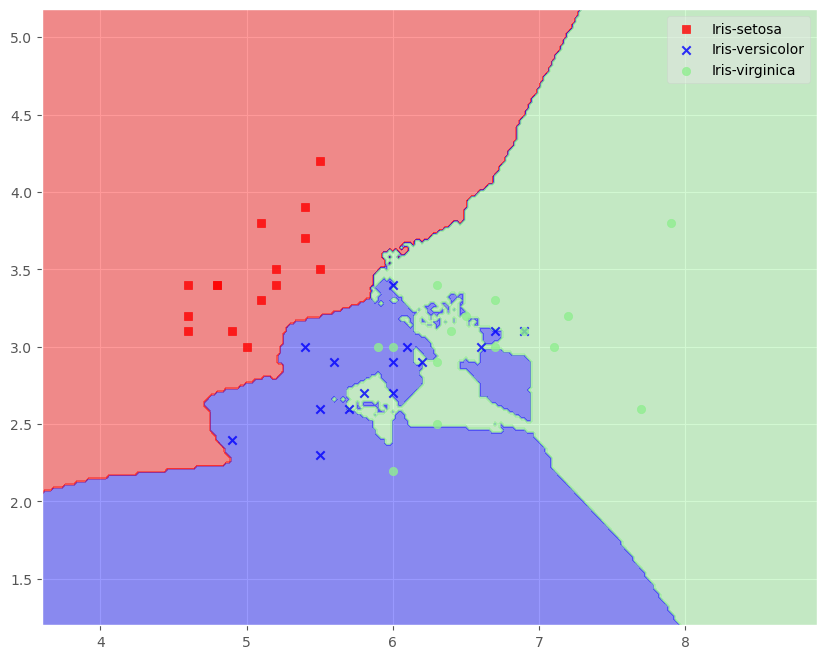

In [82]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

# Comment on the effect of feature scaling and normalization. 

What is the difference between the results of normalized features and non-normalized features. Why we are seeing the improvement (or decrease) in the accuracy.

Without normalization: Features with larger ranges dominate the distance metric, leading to poor or biased predictions.
With normalization: All features contribute equally, improving the accuracy by reflecting the true proximity between data points.

# Lets Train on all four features....

In [83]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)#
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

43
Accuracy =  0.9555555555555556


In [84]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
knn=KNearestNeighbor(3)
knn.train(Xtrain[:,feat],Ytrain)
pclasses=knn.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

assert_greater_equal(acc, 0.90)

What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (K in this case) to opitmize the performance for only first two parameters.

In [87]:
import time

In [175]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.
stime=time.time()


nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
ks=np.arange(1,20,2) # search the k in the range one to 20...
foldacc=[]          


# Perform grid search over k values
for k in ks:
    accuracies = []  # Store accuracy for each fold
    
    # Train and test on each fold
    for fold in folds:
        X_train, Y_train, X_test, Y_test = fold
        
        # Initialize and train KNN model
        knn = KNearestNeighbor(k=k)
        knn.train(X_train[:, features], Y_train)
        
        # Predict on test set
        predictions = knn.predict(X_test[:, features], methodtype='noloops')
        
        # Calculate accuracy
        accuracy = np.mean(predictions == Y_test)
        accuracies.append(accuracy)
    
    # Calculate mean accuracy for this value of k
    mean_accuracy = np.mean(accuracies)
    foldacc.append(mean_accuracy)
    print(f'Mean accuracy for k={k}: {mean_accuracy:.4f}')

# End timing
etime = time.time()
print('\nTotal Time Taken = {}'.format(etime - stime))

# Find the best k based on mean accuracies
best_k_index = np.argmax(foldacc)
best_k = ks[best_k_index]
best_accuracy = foldacc[best_k_index]

print(f'\nBest k: {best_k} with Mean Accuracy: {best_accuracy:.4f}')

etime=time.time()

print('\n Total Time Taken ={}'.format(etime-stime))

Generating CV data for 3 classes
Mean accuracy for k=1: 0.6944
Mean accuracy for k=3: 0.7639
Mean accuracy for k=5: 0.7500
Mean accuracy for k=7: 0.7708
Mean accuracy for k=9: 0.7778
Mean accuracy for k=11: 0.7778
Mean accuracy for k=13: 0.7639
Mean accuracy for k=15: 0.7708
Mean accuracy for k=17: 0.7847
Mean accuracy for k=19: 0.7847

Total Time Taken = 0.14264750480651855

Best k: 17 with Mean Accuracy: 0.7847

 Total Time Taken =0.14264750480651855


C:\Users\user\AppData\Local\Temp\ipykernel_11524\4048730105.py:68: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)


Text(0.5, 1.0, 'Cross Validation Accuracy for different Values of K')

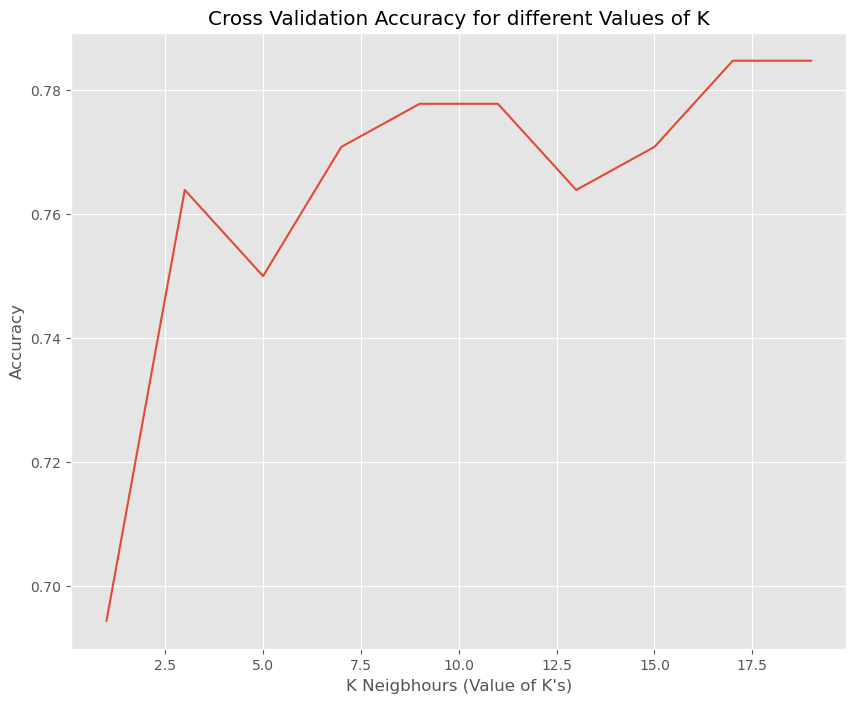

In [176]:
#Lets plot the accuracy w.r.t K
plt.plot(ks,foldacc)
plt.xlabel('K Neigbhours (Value of K\'s)')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for different Values of K')

# Lets retrain the classifier with best-k and see its accuracy using only first two features...

In [178]:
feat=[0,1]
knn=KNearestNeighbor(17,scalefeatures=True) # train a kbest-nearest neighbour classifier...
knn.train(Xtrain[:,feat],Ytrain)

#Lets test it on the set of unseen examples...
pclasses=knn.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("KNN Accuracy (for best K={}) ={} ".format(17,np.sum(pclasses==Ytest)/float(Ytest.shape[0])))

38
KNN Accuracy (for best K=17) =0.8444444444444444 


 Plotting the Decision Surface of Test Set... 


C:\Users\user\AppData\Local\Temp\ipykernel_11524\4048730105.py:68: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(x_magnitude + y_magnitude - 2 * cross_term)  # Shape: (num_test, num_train)
C:\Users\user\Desktop\Files\University\ML\Assignment\assignment-3\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  dim,


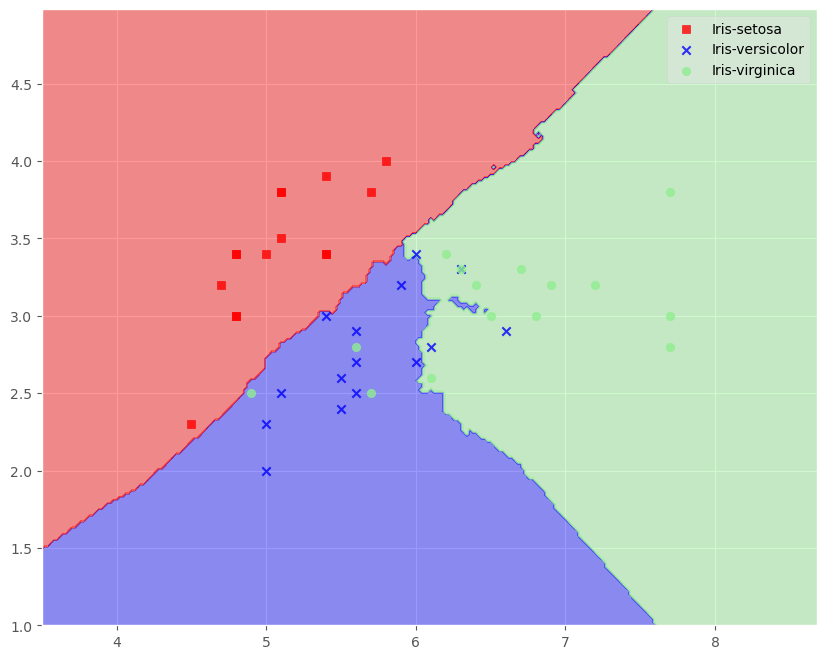

In [179]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=knn, res=0.02, cycle_marker=True, legend=1)

### Note the improvement of properly configured classifier w.r.t. to the classifier trained using only 3 Neigbours

Comment on your experience.

This is the true representative accuracy measure of our system. Since, we are removing the selection bias and hence can be much more confidently use the score as a reflection of our system's performance.